In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn import neighbors

%matplotlib inline

In [2]:
#http://archive.ics.uci.edu/ml/datasets/Wine+Quality
wine_raw = pd.read_csv('../Datasets/red_wine.csv', sep=';', skiprows=1, header=None)
wine_raw.columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'CL',
                    'free_SO2', 'total_SO2', 'density', 'ph', 'SO2', 'alcohol', 'quality']
df = wine_raw
df.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar     CL  \
0            7.4              0.70         0.00             1.9  0.076   
1            7.8              0.88         0.00             2.6  0.098   
2            7.8              0.76         0.04             2.3  0.092   
3           11.2              0.28         0.56             1.9  0.075   
4            7.4              0.70         0.00             1.9  0.076   

   free_SO2  total_SO2  density    ph   SO2  alcohol  quality  
0      11.0       34.0   0.9978  3.51  0.56      9.4        5  
1      25.0       67.0   0.9968  3.20  0.68      9.8        5  
2      15.0       54.0   0.9970  3.26  0.65      9.8        5  
3      17.0       60.0   0.9980  3.16  0.58      9.8        6  
4      11.0       34.0   0.9978  3.51  0.56      9.4        5

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed_acidity       1599 non-null float64
volatile_acidity    1599 non-null float64
citric_acid         1599 non-null float64
residual_sugar      1599 non-null float64
CL                  1599 non-null float64
free_SO2            1599 non-null float64
total_SO2           1599 non-null float64
density             1599 non-null float64
ph                  1599 non-null float64
SO2                 1599 non-null float64
alcohol             1599 non-null float64
quality             1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 149.9 KB


In [4]:
sns.set_style('white')

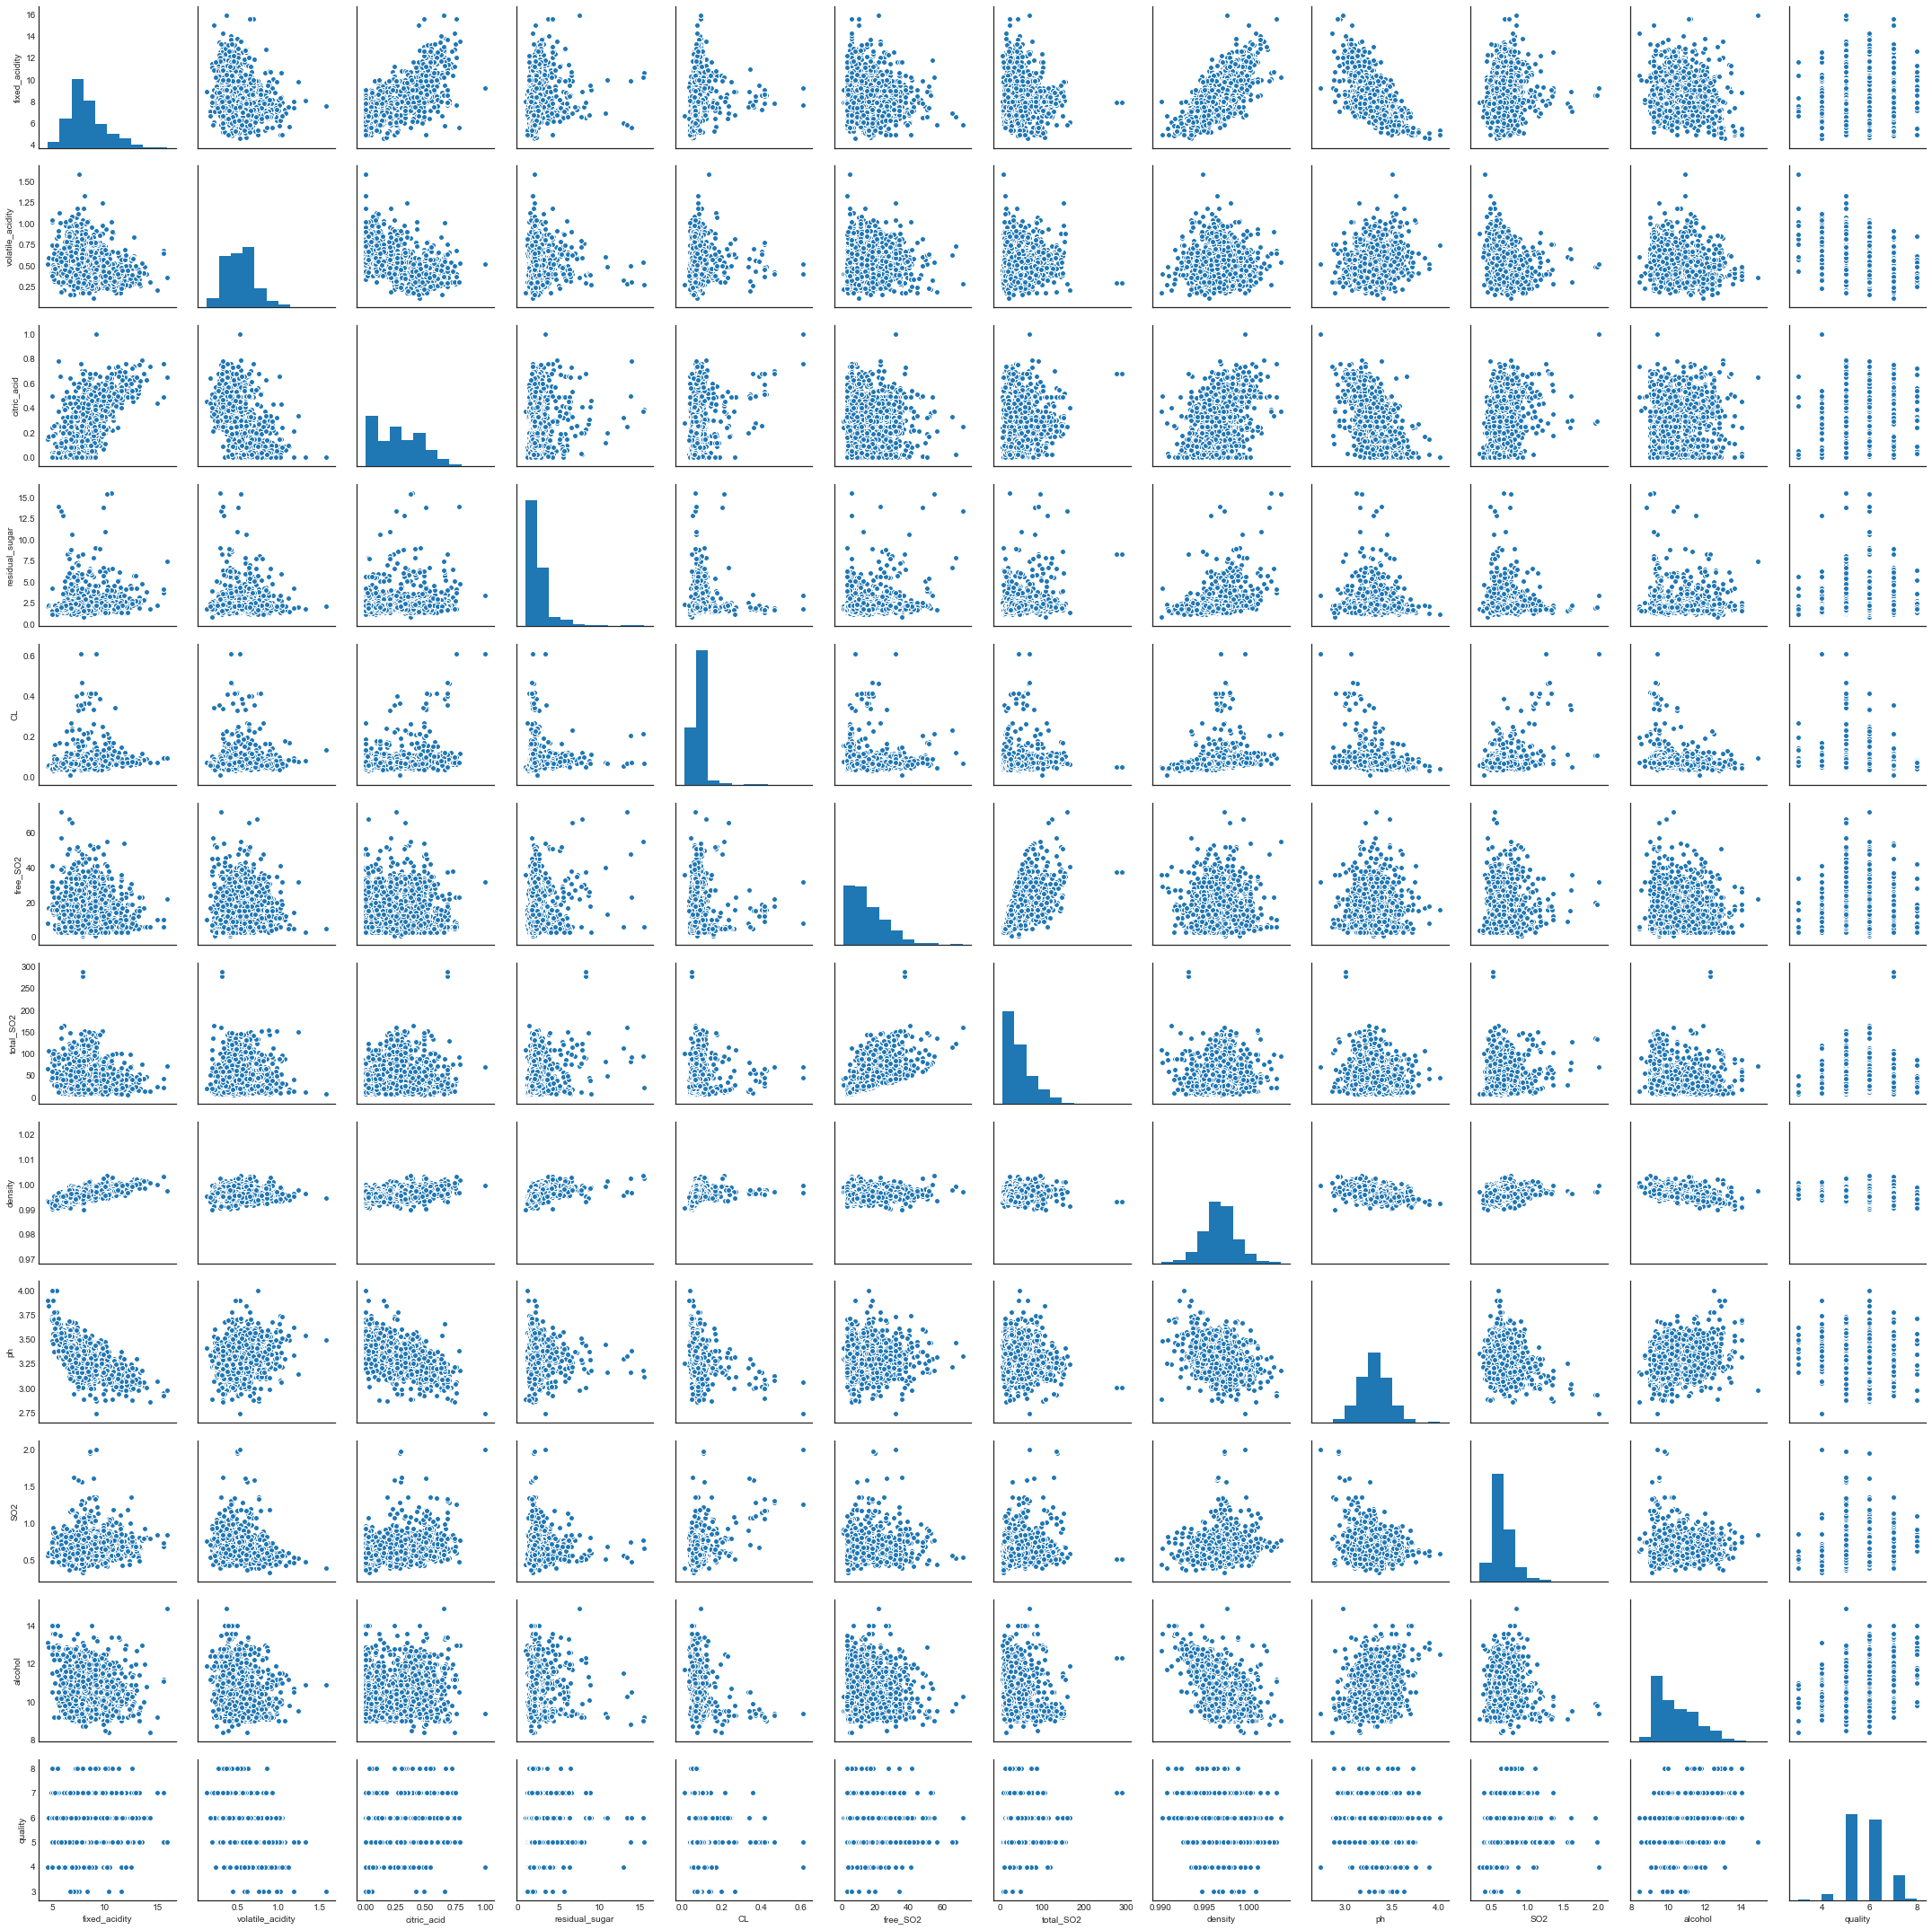

In [5]:
sns.pairplot(df)

In [6]:
#quality is classification, drop it and search for alcohol
#convert to log features that aren't normal
df.drop('quality', inplace=True, axis=1)

def getLog(x):
    result = 0
    if x > 0:
        result = np.log(x)
    return result

df['log_alcohol'] = df.alcohol.apply(getLog)
df['log_SO2'] = df.SO2.apply(getLog)
df['log_density'] = df.density.apply(getLog)
df['log_total_SO2'] = df.total_SO2.apply(getLog)
df['log_free_SO2'] = df.free_SO2.apply(getLog)
df['log_CL'] = df.CL.apply(getLog)
df['log_residual_sugar'] = df.residual_sugar.apply(getLog)
df['log_citric_acid'] = df.citric_acid.apply(getLog)
df['log_volatile_acidity'] = df.volatile_acidity.apply(getLog)

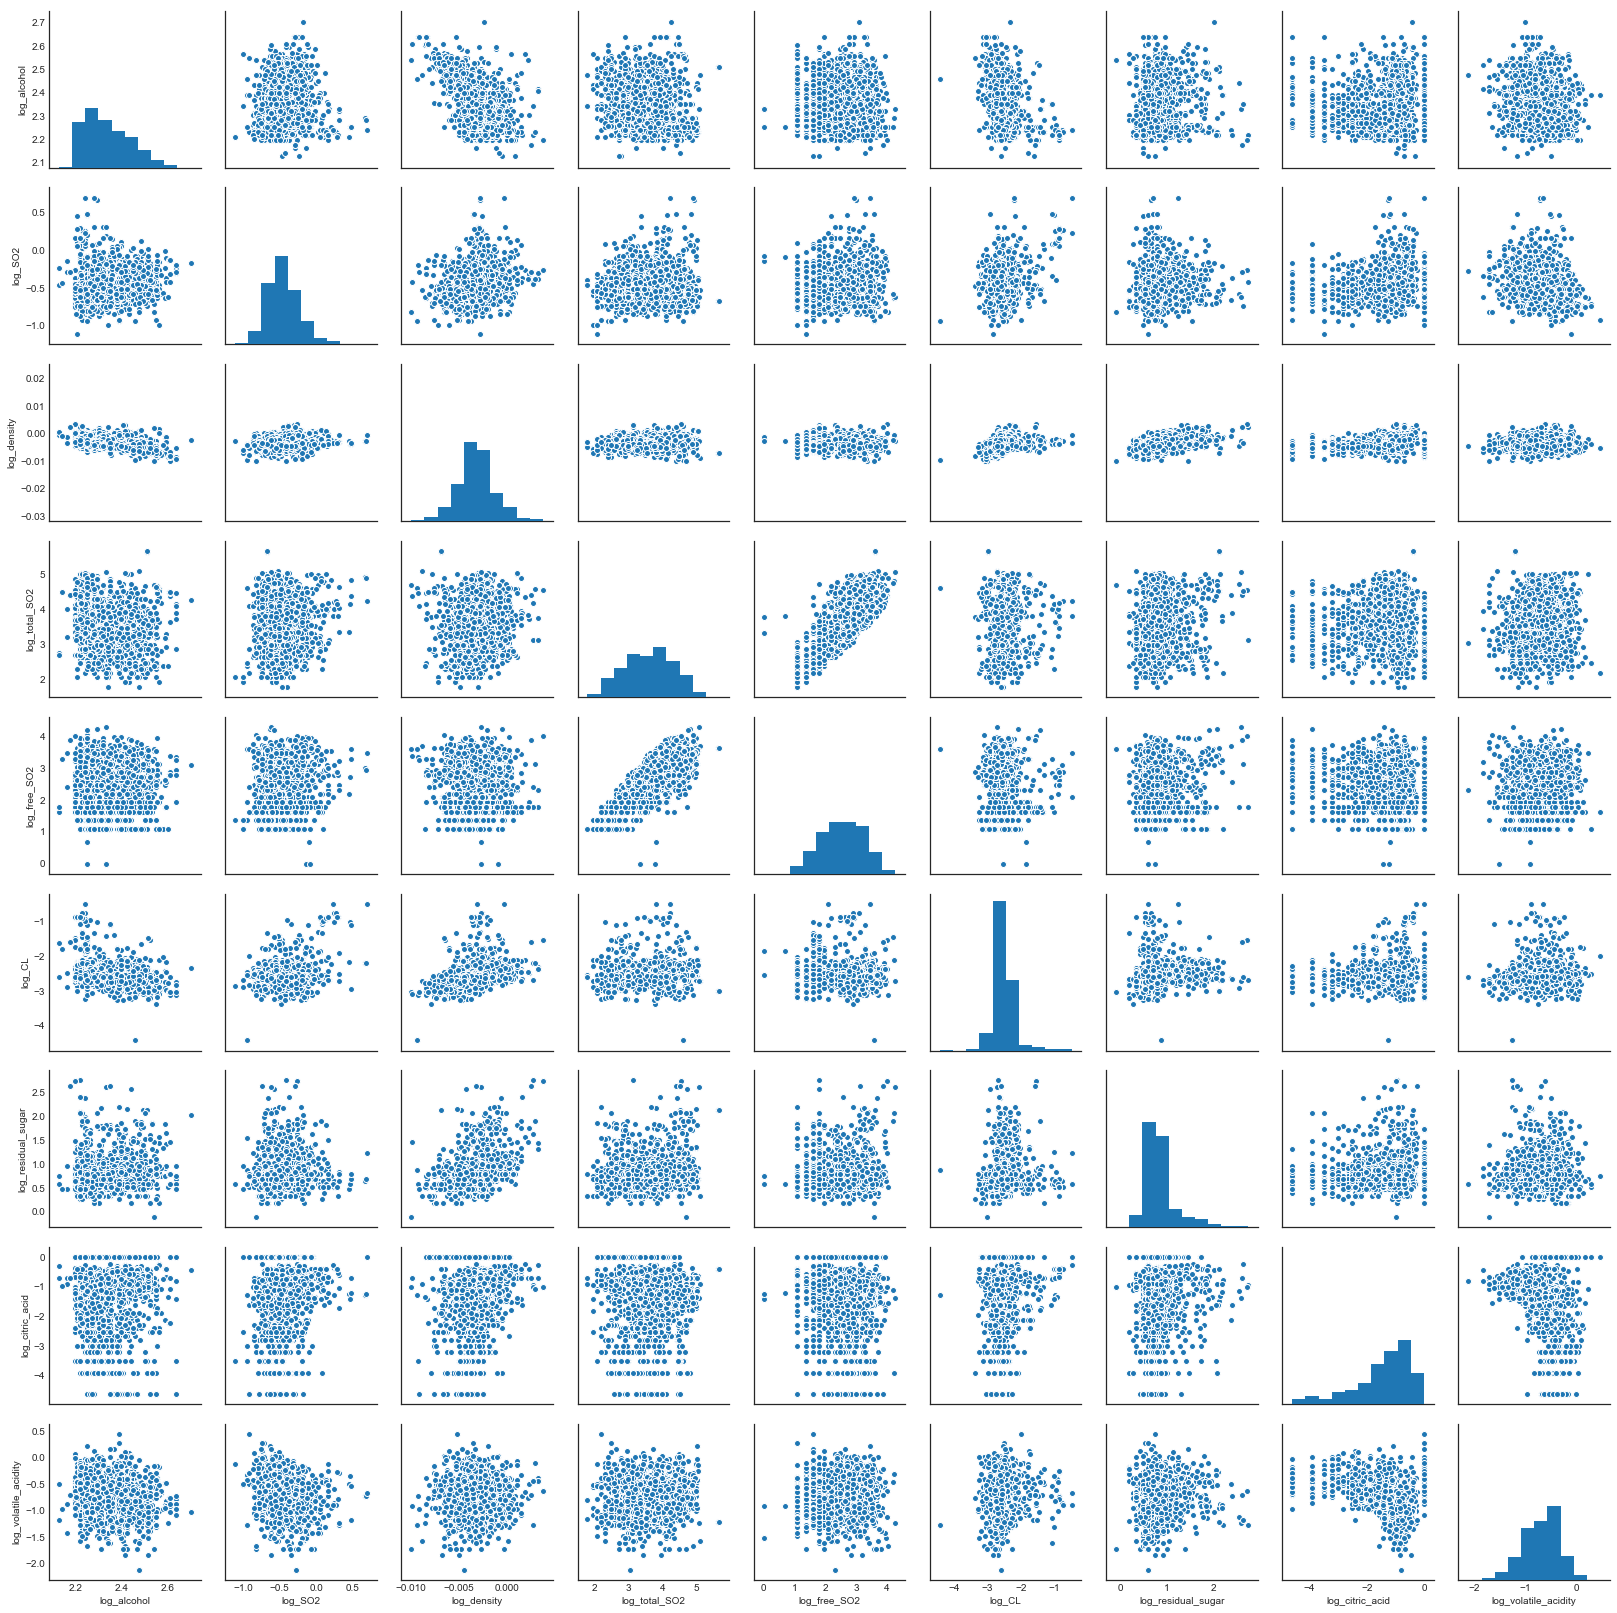

In [7]:
sns.pairplot(df.iloc[:, 11:])

In [8]:
#use log versions of original; more normalized data
df.drop(['alcohol', 'SO2', 'density', 'total_SO2', 'free_SO2', 'CL', 'residual_sugar', 'citric_acid', 'volatile_acidity'], axis=1, inplace=True)
df.head()

fixed_acidity    ph  log_alcohol   log_SO2  log_density  log_total_SO2  \
0            7.4  3.51     2.240710 -0.579818    -0.002202       3.526361   
1            7.8  3.20     2.282382 -0.385662    -0.003205       4.204693   
2            7.8  3.26     2.282382 -0.430783    -0.003005       3.988984   
3           11.2  3.16     2.282382 -0.544727    -0.002002       4.094345   
4            7.4  3.51     2.240710 -0.579818    -0.002202       3.526361   

   log_free_SO2    log_CL  log_residual_sugar  log_citric_acid  \
0      2.397895 -2.577022            0.641854         0.000000   
1      3.218876 -2.322788            0.955511         0.000000   
2      2.708050 -2.385967            0.832909        -3.218876   
3      2.833213 -2.590267            0.641854        -0.579818   
4      2.397895 -2.577022            0.641854         0.000000   

   log_volatile_acidity  
0             -0.356675  
1             -0.127833  
2             -0.274437  
3             -1.272966  
4             -0.356675

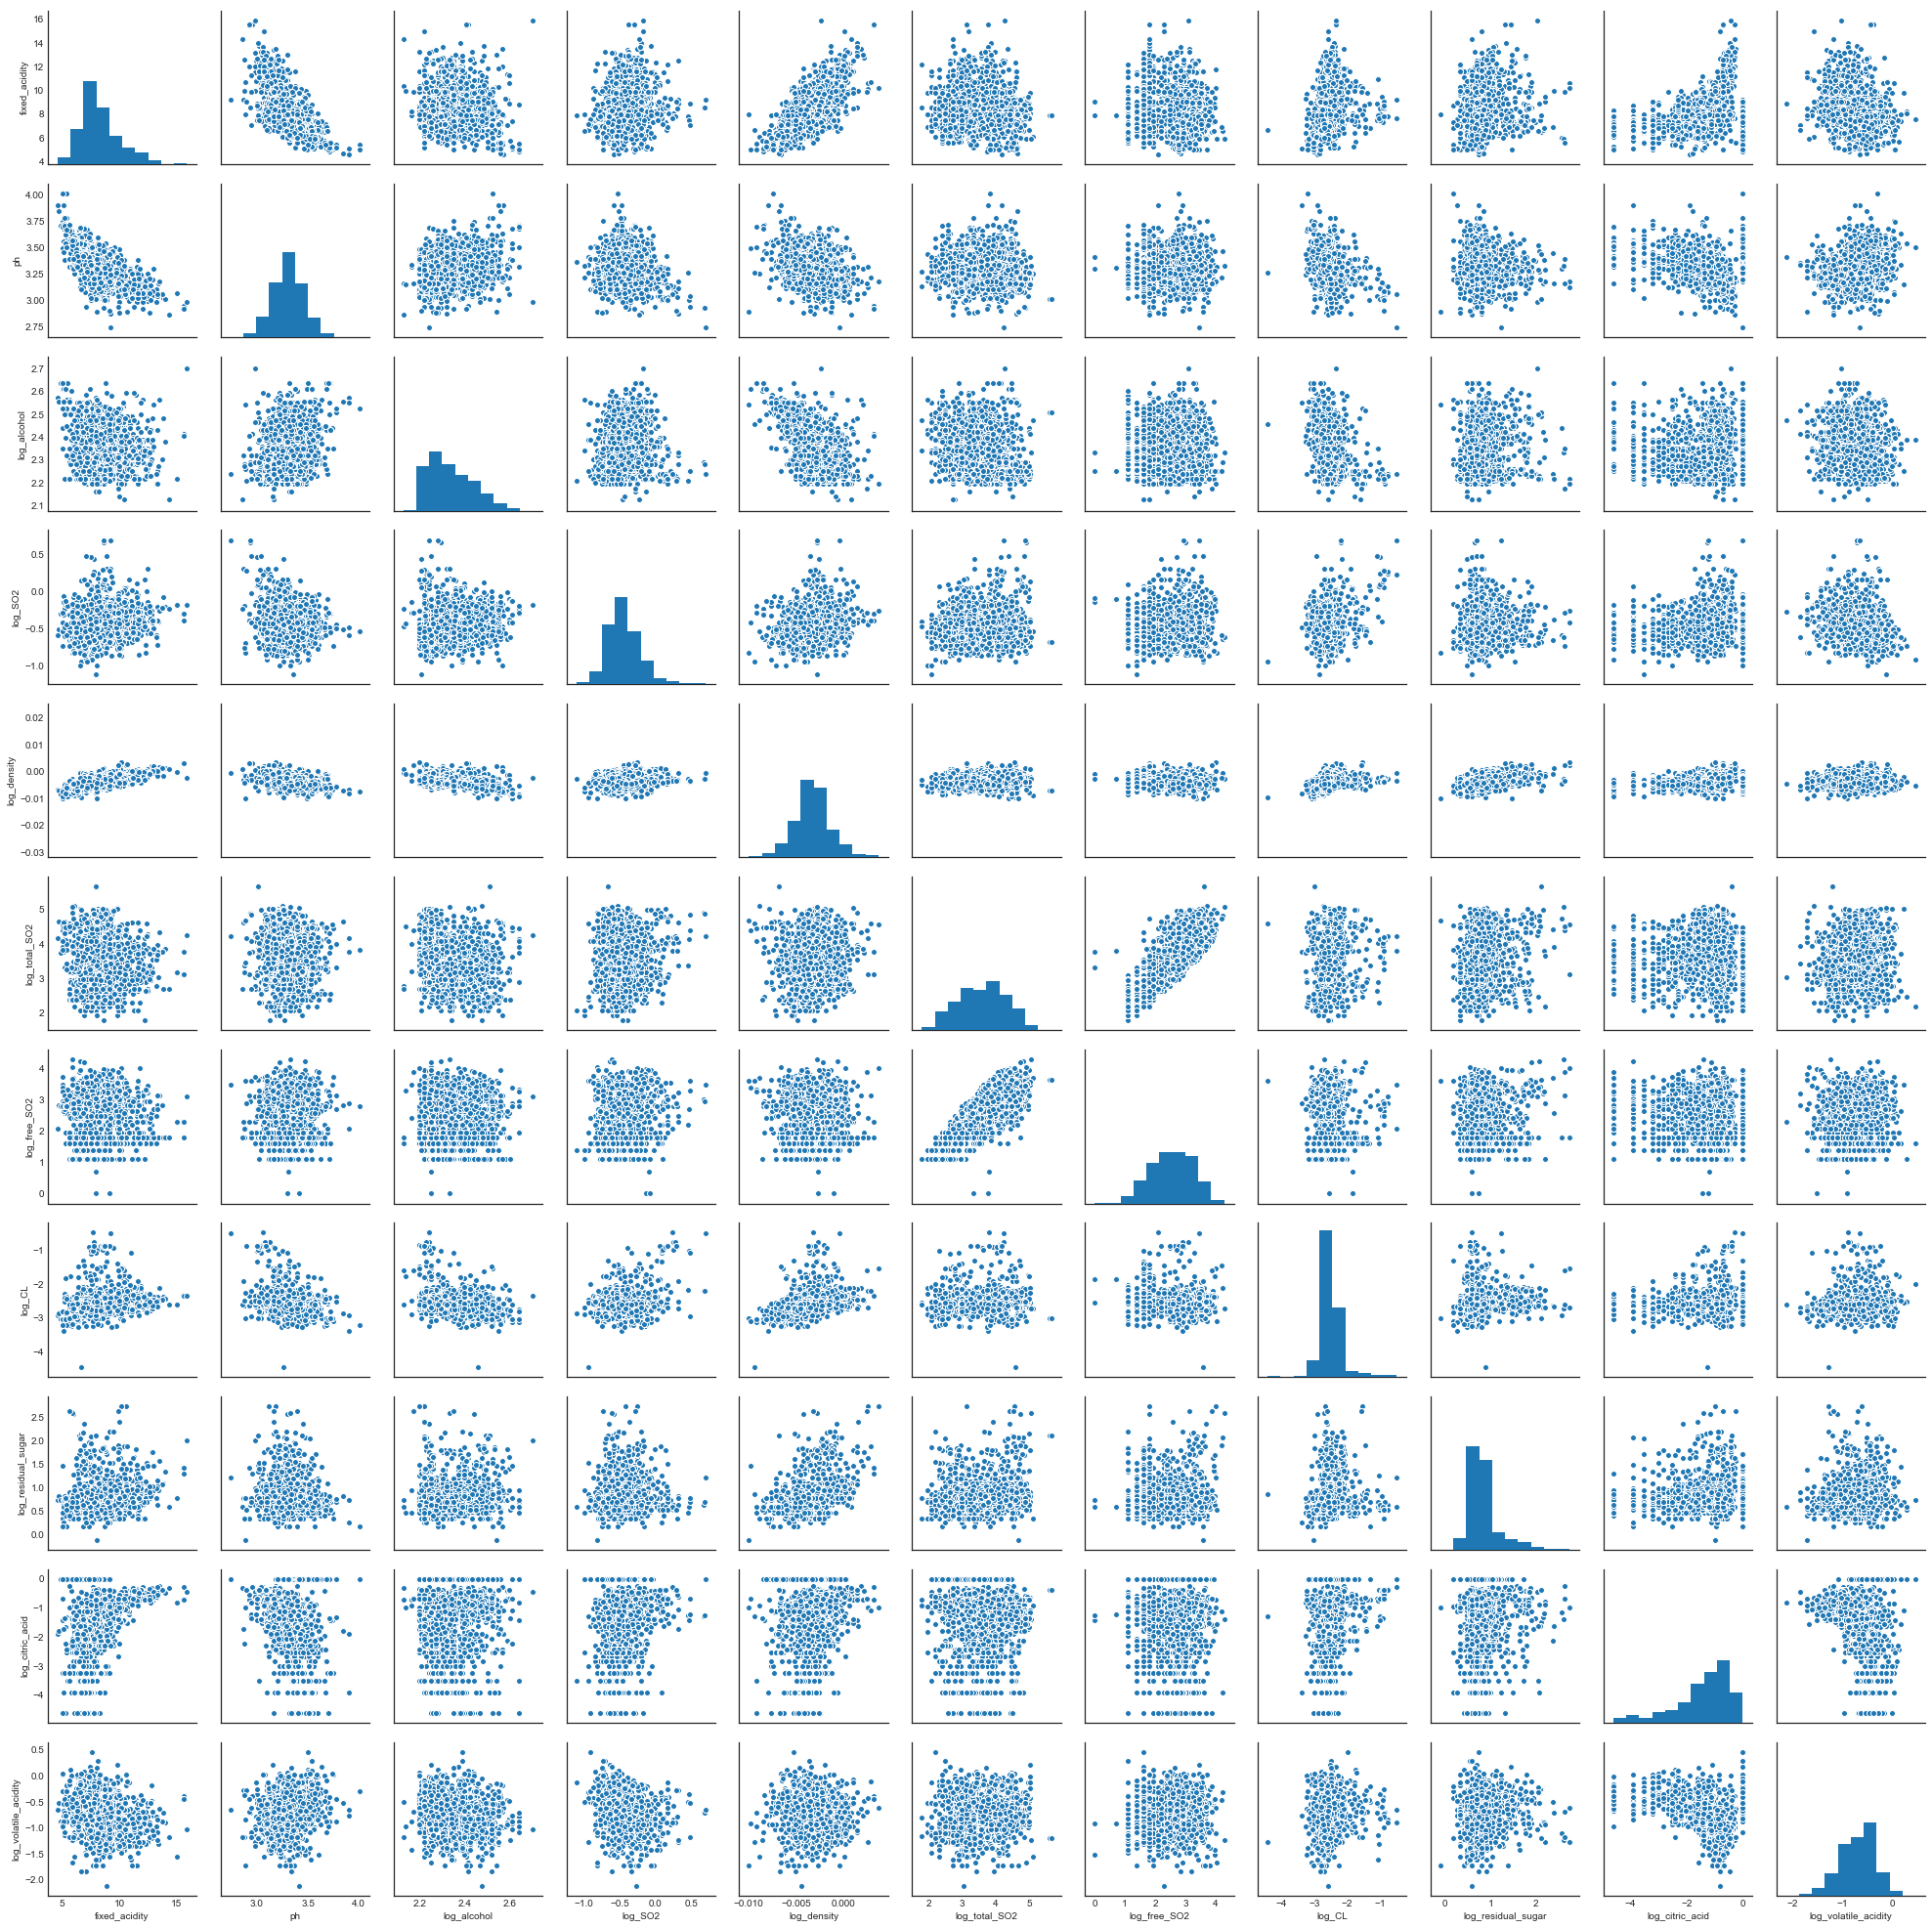

In [9]:
sns.pairplot(df)

In [10]:
#original model formula
linear_formula = 'log_alcohol ~ fixed_acidity+ph+log_SO2+log_density+log_total_SO2+log_free_SO2+log_CL+log_residual_sugar+log_citric_acid+log_volatile_acidity'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=df).fit()

print('Params: \n', lm.params)
print('\nPvalues: \n', lm.pvalues)
print('\nRsquared:', lm.rsquared)

Params: 
 Intercept                0.557854
fixed_acidity            0.053306
ph                       0.334264
log_SO2                  0.095928
log_density            -60.307332
log_total_SO2           -0.009625
log_free_SO2            -0.001732
log_CL                  -0.006264
log_residual_sugar       0.124941
log_citric_acid          0.001543
log_volatile_acidity     0.005280
dtype: float64

Pvalues: 
 Intercept                9.987753e-23
fixed_acidity           5.513947e-183
ph                      3.151890e-117
log_SO2                  3.420671e-44
log_density             7.972656e-316
log_total_SO2            3.500872e-03
log_free_SO2             5.978775e-01
log_CL                   1.992477e-01
log_residual_sugar      5.108678e-153
log_citric_acid          2.940863e-01
log_volatile_acidity     2.434635e-01
dtype: float64

Rsquared: 0.7064770521496504


In [11]:
#get rid of values with high pvalues
# model formula
linear_formula = 'log_alcohol ~ fixed_acidity+ph+log_SO2+log_density+log_total_SO2+log_residual_sugar'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=df).fit()

print('Params: \n', lm.params)
print('\nPvalues: \n', lm.pvalues)
print('\nRsquared:', lm.rsquared)

Params: 
 Intercept              0.547529
fixed_acidity          0.053688
ph                     0.338673
log_SO2                0.092634
log_density          -60.454262
log_total_SO2         -0.010773
log_residual_sugar     0.125112
dtype: float64

Pvalues: 
 Intercept              2.467331e-23
fixed_acidity         7.248032e-216
ph                    2.747308e-134
log_SO2                8.957989e-48
log_density            0.000000e+00
log_total_SO2          1.288105e-07
log_residual_sugar    8.437132e-155
dtype: float64

Rsquared: 0.705844006429792


In [12]:
regr = linear_model.LinearRegression()
Y = df['log_alcohol'].values.reshape(-1, 1)
X = df[['fixed_acidity', 'ph', 'log_SO2', 'log_density', 'log_total_SO2', 'log_residual_sugar']]
regr.fit(X, Y)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:\n', regr.score(X, Y))


Coefficients: 
 [[ 5.36879051e-02  3.38673395e-01  9.26340209e-02 -6.04542618e+01
  -1.07733417e-02  1.25111553e-01]]

Intercept: 
 [0.54752892]

R-squared:
 0.7058440064297922


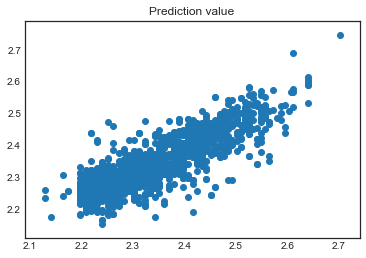

In [13]:
#check if line plot is linear
outcome = Y
predicted = regr.predict(X).ravel()

plt.scatter(outcome, predicted)
plt.title('Prediction value')
plt.show()

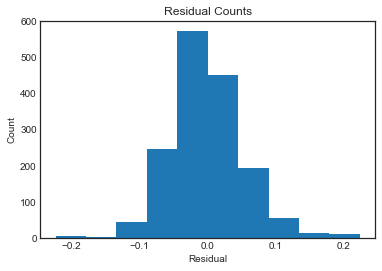

In [14]:
#check if plot has normal distribution
actual = df['log_alcohol']
residual = actual - predicted

plt.hist(residual)
plt.title('Residual Counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

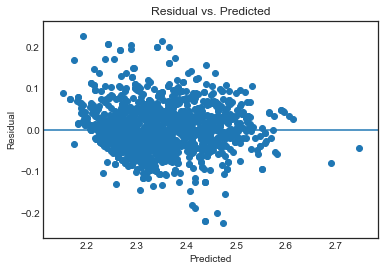

In [15]:
#check if errors are consistent for all predicted values
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

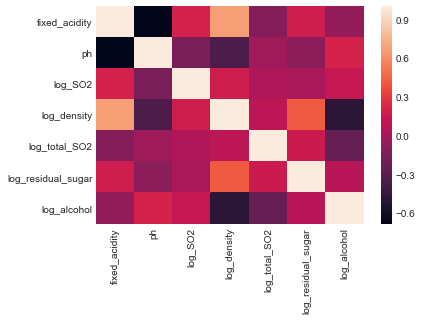

In [16]:
#search for similar features
sns.heatmap(df[['fixed_acidity', 'ph', 'log_SO2', 'log_density', 'log_total_SO2', 'log_residual_sugar', 'log_alcohol']].corr())

In [17]:
#keep fixed acidity, remove density and residual sugar
linear_formula = 'log_alcohol ~ ph+log_SO2+log_density+log_total_SO2+log_residual_sugar'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=df).fit()

print('Params: \n', lm.params)
print('\nPvalues: \n', lm.pvalues)
print('\nRsquared:', lm.rsquared)

Params: 
 Intercept              2.192873
ph                     0.035124
log_SO2                0.113067
log_density          -34.014358
log_total_SO2         -0.033805
log_residual_sugar     0.107044
dtype: float64

Pvalues: 
 Intercept              0.000000e+00
ph                     5.774386e-03
log_SO2                1.706674e-39
log_density           8.100211e-156
log_total_SO2          5.159268e-36
log_residual_sugar     2.102039e-71
dtype: float64

Rsquared: 0.45432991341259876


In [18]:
Y = df['log_alcohol'].values.reshape(-1, 1)
X = df[['ph', 'log_SO2', 'log_density', 'log_total_SO2', 'log_residual_sugar']]
regr.fit(X, Y)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:\n', regr.score(X, Y))


Coefficients: 
 [[ 3.51241725e-02  1.13067096e-01 -3.40143581e+01 -3.38046622e-02
   1.07043837e-01]]

Intercept: 
 [2.19287287]

R-squared:
 0.4543299134125992


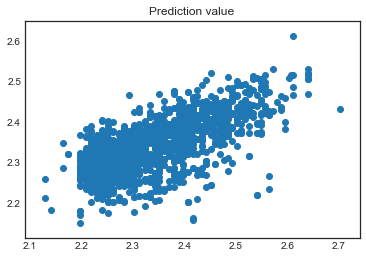

In [19]:
#check if line plot is linear
outcome = Y
predicted = regr.predict(X).ravel()

plt.scatter(outcome, predicted)
plt.title('Prediction value')
plt.show()

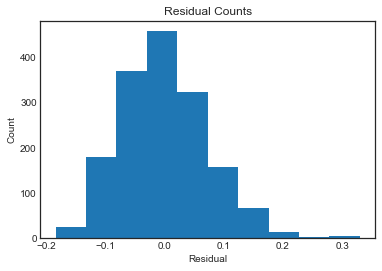

In [20]:
#check if plot has normal distribution
actual = df['log_alcohol']
residual = actual - predicted

plt.hist(residual)
plt.title('Residual Counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

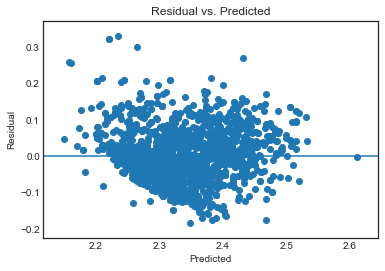

In [21]:
#check if errors are consistent for all predicted values
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [22]:
# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=75)
X = pd.DataFrame(df.log_alcohol)
Y = df[['ph', 'log_SO2', 'log_density', 'log_total_SO2', 'log_residual_sugar']]
knn.fit(X, Y)

print('\nR-squared:\n', knn.score(X, Y))


R-squared:
 0.07696040606058838


In [23]:
#check with weights
knn = neighbors.KNeighborsRegressor(n_neighbors=75, weights='distance')
X = pd.DataFrame(df.log_alcohol)
Y = df[['ph', 'log_SO2', 'log_density', 'log_total_SO2', 'log_residual_sugar']]
knn.fit(X, Y)

print('\nR-squared:\n', knn.score(X, Y))


R-squared:
 0.12791838109200443


For this type of data set, I believe the OLS regression (0.45432) is better than KNN Regression (0.07696). The KNN Regression model does not appear to have a good coefficient of determination compared to the linear regression model. One reason may be because it searches for the neighest neighbors, which may or may not be accurate, where as the linear regression uses all the data to formulate a prediction.

A situation where I would use the KNN over the OLS model is when I need something calculated quickly. There are steps that are required to check if a linear regression model can be used, whereas a KNN model is more straightforward.